#### Import packages

In [9]:
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import numpy as np

#### Load dataset and split

In [10]:
dataset = fetch_openml(name="boston", version=1, as_frame=True)

X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Define the model, fit and predict

In [11]:
max_iter = 1000
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(activation="relu", max_iter=max_iter, random_state=42)

mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2:.4f}")


R^2 score: 0.8079


#### Plot partial dependence

Selected features for PDP: ['AGE' 'INDUS']


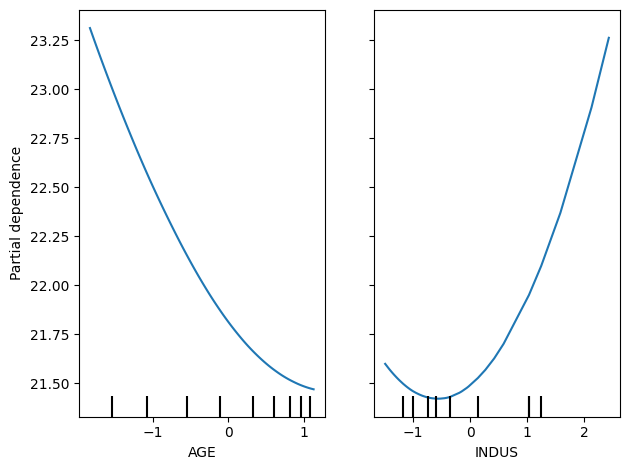

In [12]:
feature_names = X.columns.tolist()
selected_features = np.random.choice(feature_names, size=2, replace=False)

print(f"Selected features for PDP: {selected_features}")

# Plotting Partial Dependence Plots
PartialDependenceDisplay.from_estimator(mlp, X_train_scaled, features=[feature_names.index(f) for f in selected_features],
                                         feature_names=feature_names)
plt.tight_layout()
plt.show()